In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(["seaborn-bright",'dark_background'])

### Train: 1,75,296 rows x 18 columns
### Test: 17,520 rows x 15 columns
 

* Data Attributes:
    * ‘Year',
    * 'Month',
    * 'Day',
    * 'Hour',
    * 'Minute',
    * 'Temperature', 0C
    * 'Clearsky DHI', w/m2
    * 'Clearsky DNI', w/m2
    * 'Clearsky GHI', w/m2
    * 'Cloud Type',
        * Cloud Type 0    Clear
        * Cloud Type 1    Probably Clear
        * Cloud Type 2    Fog
        * Cloud Type 3    Water
        * bCloud Type 4    Super-Cooled Water
        * Cloud Type 5    Mixed
        * Cloud Type 6    Opaque Ice
        * Cloud Type 7    Cirrus
        * Cloud Type 8    Overlapping
        * Cloud Type 9    Overshooting
        * Cloud Type 10    Unknown
        * Cloud Type 11    Dust
        * Cloud Type 12    Smoke
        * Cloud Type -15    N/A
    * 'Dew Point', C
    * 'Fill Flag',
        * Fill Flag 0    N/A
        * Fill Flag 1    Missing Image
        * Fill Flag 2    Low Irradiance
        * Fill Flag 3    Exceeds Clearsky
        * Fill Flag 4    Missing CLoud Properties
        * Fill Flag 5    Rayleigh Violation
        * Fill Flag any   N/A
    * 'Relative Humidity', %
    * 'Solar Zenith Angle', Degree to calculate cos(θ)
    * 'Pressure', mbar
    * 'Precipitable Water', cm
    * 'Wind Direction', Degrees
    * 'Wind Speed' m/s
* Skills: 
    * Time series forecasting
    * Multi-label prediction
    * Optimizing MSE

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


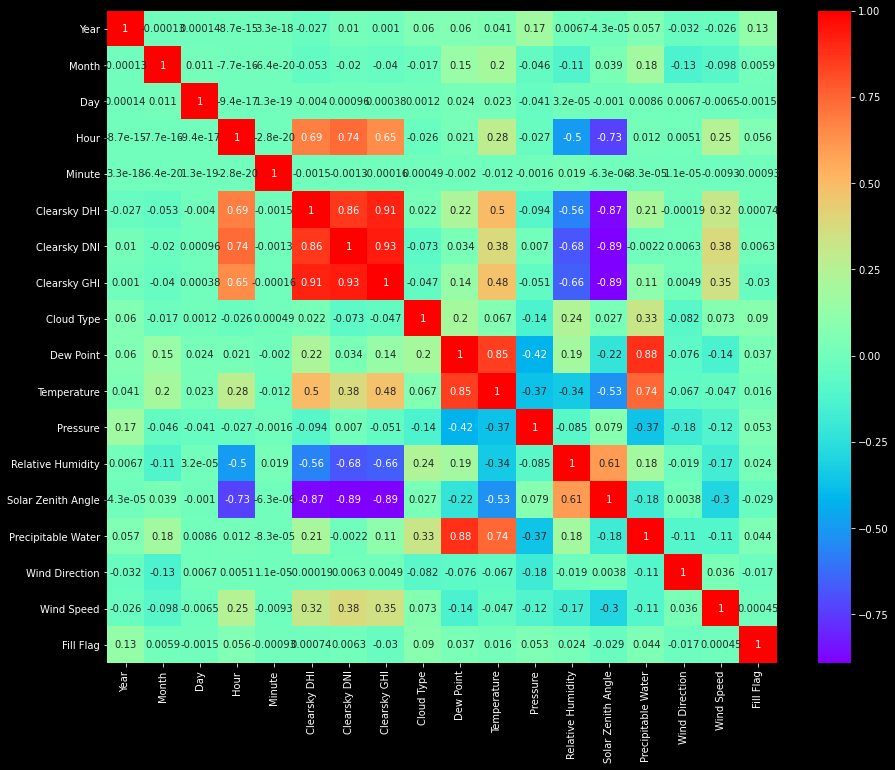

In [3]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(), annot=True, cmap='rainbow' )
plt.show()

In [4]:
X = train_data.drop(columns=['Clearsky GHI'])
y = train_data['Clearsky GHI']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [8]:
models = []
models.append(('LinearRegressor', LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
#models.append(('RandomForestRegressor',RandomForestRegressor()))
models.append(('ExtraTreesRegressor',ExtraTreesRegressor()))
models.append(('XGBRegressor',XGBRegressor()))

In [9]:
from sklearn.metrics import mean_squared_error

In [11]:
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    valid_pred = model.predict(x_valid)
    print(name)
    print(f"Train score = {model.score(x_train, y_train)}\tTrain MSE = {mean_squared_error(train_pred, y_train)}")
    print(f"Validation score = {model.score(x_valid, y_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y_valid)}")
    print()

LinearRegressor
Train score = 0.9283158251288062	Train MSE = 7685.081678770056
Validation score = 0.9291138186035264	Validation MSE = 7651.223661879938

DecisionTreeRegressor
Train score = 1.0	Train MSE = 0.0
Validation score = 0.9998310340708934	Validation MSE = 18.237632347572106

ExtraTreesRegressor
Train score = 0.9999999999999575	Train MSE = 4.56370938297819e-09
Validation score = 0.9999797627670262	Validation MSE = 2.1843410482840446

XGBRegressor
Train score = 0.9999590142496344	Train MSE = 4.3939801189244925
Validation score = 0.9999424940435344	Validation MSE = 6.207005739912439



In [12]:
model = ExtraTreesRegressor()

In [13]:
model.fit(x_train, y_train)

ExtraTreesRegressor()

In [14]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [20]:
X1 = train_data.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y1 = train_data['Clearsky GHI']

X2 = train_data.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y2 = train_data['Clearsky DHI']

X3 = train_data.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y3 = train_data['Clearsky DNI']

In [21]:
x1_train, x1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.25, random_state=101)

x2_train, x2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.25, random_state=101)

x3_train, x3_valid, y3_train, y3_valid = train_test_split(X3, y3, test_size=0.25, random_state=101)

In [22]:
model1 = ExtraTreesRegressor()
model1.fit(x1_train, y1_train)

model2 = ExtraTreesRegressor()
model2.fit(x2_train, y2_train)

model3 = ExtraTreesRegressor()
model3.fit(x3_train, y3_train)

ExtraTreesRegressor()

In [25]:
train_pred = model1.predict(x1_train)
valid_pred = model1.predict(x1_valid)
print('Clearsky GHI')
print(f"Train score = {model1.score(x1_train, y1_train)}\tTrain MSE = {mean_squared_error(train_pred, y1_train)}")
print(f"Validation score = {model1.score(x1_valid, y1_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y1_valid)}")

Clearsky GHI
Train score = 0.9999999999967222	Train MSE = 3.514056224899086e-07
Validation score = 0.9996782429795203	Validation MSE = 34.72940536464038


In [28]:
train_pred = model2.predict(x2_train)
valid_pred = model2.predict(x2_valid)
print('Clearsky DHI')
print(f"Train score = {model2.score(x2_train, y2_train)}\tTrain MSE = {mean_squared_error(train_pred, y2_train)}")
print(f"Validation score = {model2.score(x2_valid, y2_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y2_valid)}")
      

train_pred = model3.predict(x3_train)
valid_pred = model3.predict(x3_valid)
print('Clearsky DNI')
print(f"Train score = {model3.score(x3_train, y3_train)}\tTrain MSE = {mean_squared_error(train_pred, y3_train)}")
print(f"Validation score = {model3.score(x3_valid, y3_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y3_valid)}")

Clearsky DHI
Train score = 1.0	Train MSE = 0.0
Validation score = 0.9784456720817238	Validation MSE = 88.83591845107703
Clearsky DNI
Train score = 0.9999999999963396	Train MSE = 5.004867956674383e-07
Validation score = 0.9927619479970987	Validation MSE = 995.2184640448155


In [29]:
models = []
models.append(('LinearRegressor', LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('XGBRegressor',XGBRegressor()))

In [30]:
for name, model in models:
    model.fit(x2_train, y2_train)
    train_pred = model.predict(x2_train)
    valid_pred = model.predict(x2_valid)
    print(name)
    print(f"Train score = {model.score(x2_train, y2_train)}\tTrain MSE = {mean_squared_error(train_pred, y2_train)}")
    print(f"Validation score = {model.score(x2_valid, y2_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y2_valid)}")
    print()

LinearRegressor
Train score = 0.7858038415151078	Train MSE = 882.8946930224812
Validation score = 0.786082908954467	Validation MSE = 881.6568685168477

DecisionTreeRegressor
Train score = 1.0	Train MSE = 0.0
Validation score = 0.9487732872080409	Validation MSE = 211.13031672143117

XGBRegressor
Train score = 0.9734760862230476	Train MSE = 109.32886414724787
Validation score = 0.9653007803923438	Validation MSE = 143.0124407065388



In [31]:
for name, model in models:
    model.fit(x3_train, y3_train)
    train_pred = model.predict(x3_train)
    valid_pred = model.predict(x3_valid)
    print(name)
    print(f"Train score = {model.score(x3_train, y3_train)}\tTrain MSE = {mean_squared_error(train_pred, y3_train)}")
    print(f"Validation score = {model.score(x3_valid, y3_valid)}\tValidation MSE = {mean_squared_error(valid_pred, y3_valid)}")
    print()

LinearRegressor
Train score = 0.8519688790735779	Train MSE = 20240.267839545733
Validation score = 0.8554795221883216	Validation MSE = 19871.29242690018

DecisionTreeRegressor
Train score = 1.0	Train MSE = 0.0
Validation score = 0.9839499301320431	Validation MSE = 2206.8542579408545

XGBRegressor
Train score = 0.9943217560819134	Train MSE = 776.3852427859969
Validation score = 0.9931494834639943	Validation MSE = 941.9330701332865



In [32]:
test_data.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [33]:
x_test = test_data.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])

In [37]:
x_test = x_test[x1_train.columns]

In [38]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

In [40]:
sample.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [41]:
submission = pd.DataFrame()
submission['Clearsky DHI'] = pred2
submission['Clearsky DNI'] = pred3
submission['Clearsky GHI'] = pred1

In [44]:
submission['Clearsky DHI'] = submission['Clearsky DHI'].astype("int")
submission['Clearsky DNI'] = submission['Clearsky DNI'].astype("int")
submission['Clearsky GHI'] = submission['Clearsky GHI'].astype("int")

In [45]:
submission.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [46]:
submission.to_csv('submission.csv', index=False)